## Annotated follow-along guide: Use Python to conduct a hypothesis test

### two-sample test

In [16]:
import pandas as pd
from scipy import stats
import math

In [3]:
education_raw = pd.read_csv("./Raw_data/education_districtwise.csv")
education_info = education_raw.dropna()

education_info.head(10)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


In [5]:
education_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    634 non-null    object 
 1   STATNAME    634 non-null    object 
 2   BLOCKS      634 non-null    int64  
 3   VILLAGES    634 non-null    int64  
 4   CLUSTERS    634 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.6+ KB


***

Department of Education asks you to collect data on mean district literacy rates for two of the nation’s largest states: STATE21 and STATE28. STATE28 has almost 40 districts, and STATE21 has more than 70. Due to limited time and resources, you are only able to survey 20 randomly chosen districts in each state. The department asks you to determine if the difference between the two mean district literacy rates is statistically significant or due to chance.

***

## exploratory analysis

In [6]:
# Gather data from State 21

state21_edu = education_info[ education_info["STATNAME"] == "STATE21"]

print(state21_edu.shape)
print(state21_edu.info())
state21_edu.head(10)

(71, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 133 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    71 non-null     object 
 1   STATNAME    71 non-null     object 
 2   BLOCKS      71 non-null     int64  
 3   VILLAGES    71 non-null     int64  
 4   CLUSTERS    71 non-null     int64  
 5   TOTPOPULAT  71 non-null     float64
 6   OVERALL_LI  71 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 4.4+ KB
None


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
133,DISTRICT607,STATE21,14,1357,127,3464228.0,72.03
134,DISTRICT50,STATE21,12,594,86,4138605.0,70.11
135,DISTRICT61,STATE21,16,1919,159,3683896.0,70.43
136,DISTRICT191,STATE21,10,1141,69,4773138.0,58.67
137,DISTRICT328,STATE21,7,1116,85,2335398.0,55.08
138,DISTRICT594,STATE21,8,1027,93,1838771.0,65.70
139,DISTRICT238,STATE21,14,771,175,3447405.0,74.80
140,DISTRICT193,STATE21,7,312,57,1302156.0,73.54
141,DISTRICT380,STATE21,6,318,31,4661452.0,85.00
142,DISTRICT570,STATE21,4,399,37,1674714.0,82.20


In [7]:
# Gather data from State 28

state28_edu = education_info[ education_info["STATNAME"] == "STATE28"]

print(state28_edu.shape)
print(state28_edu.info())
state28_edu.head(10)

(38, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 208 to 245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    38 non-null     object 
 1   STATNAME    38 non-null     object 
 2   BLOCKS      38 non-null     int64  
 3   VILLAGES    38 non-null     int64  
 4   CLUSTERS    38 non-null     int64  
 5   TOTPOPULAT  38 non-null     float64
 6   OVERALL_LI  38 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.4+ KB
None


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
208,DISTRICT495,STATE28,18,1210,193,3922780.0,58.06
209,DISTRICT208,STATE28,27,1534,251,5082868.0,58.26
210,DISTRICT618,STATE28,5,183,34,656916.0,56.00
211,DISTRICT554,STATE28,17,852,169,3419622.0,53.53
212,DISTRICT642,STATE28,21,1102,241,4476044.0,60.90
213,DISTRICT347,STATE28,11,623,94,2228397.0,59.65
214,DISTRICT4,STATE28,9,990,140,2806200.0,55.10
215,DISTRICT52,STATE28,7,978,131,1690948.0,57.04
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
217,DISTRICT266,STATE28,16,1621,173,3068149.0,53.56


In [ ]:
## Get the 20 samples from each state

state21_samp = state21_edu.sample(n=20,replace=True,random_state=13500)
state28_samp = state28_edu.sample(n=20,replace=True,random_state=18700)

## Get the p_value using the stats ttest_ind() method

print(f"State 21 sample mean: {state21_samp["OVERALL_LI"].mean():.4f}")
print(f"State 28 sample mean: {state28_samp["OVERALL_LI"].mean():.4f}")
print(f"State 21 sample std: {state21_samp["OVERALL_LI"].std():.4f}")
print(f"State 28 sample std: {state28_samp["OVERALL_LI"].std():.4f}")

## t_test calc

stats.ttest_ind(a = state21_samp["OVERALL_LI"], b =state28_samp["OVERALL_LI"], equal_var= False)

State 21 sample mean: 66.4385
State 28 sample mean: 63.3155
State 21 sample std: 8.6047
State 28 sample std: 7.0732


TtestResult(statistic=np.float64(1.2538635021628717), pvalue=np.float64(0.2178354452819162), df=np.float64(36.62821325057145))

In [17]:
## Trying to perform the t_test Score using the formula

s1_mean = state21_samp["OVERALL_LI"].mean()
s2_mean = state28_samp["OVERALL_LI"].mean()
s1_std = state21_samp["OVERALL_LI"].std()
s2_std = state28_samp["OVERALL_LI"].std()

samples_size = 20

t_score = (s1_mean - s2_mean) / (math.sqrt(((s1_std**2)/samples_size)+((s2_std**2)/samples_size)))
t_score

np.float64(1.2538635021628717)

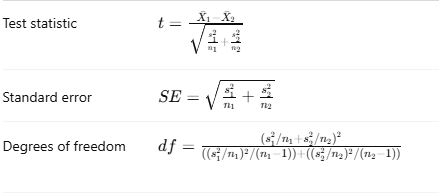

In [34]:
# calculate the degress of freedom

df = (((s1_std**2 / samples_size)+(s2_std ** 2/samples_size))**2)/(((s1_std**2 / samples_size)**2 / (samples_size -1 )) + ((s2_std ** 2/samples_size)**2/(samples_size -1)))

print(f"Degrees of Freedom: {df:.3f}")

Degrees of Freedom: 36.628


In [37]:
p_value = 2 * (1 - stats.t.cdf(t_score, df))

p_value 

np.float64(0.21783544528191623)

In [48]:
import datetime
last_day = datetime.date(2025,9,22)
today = datetime.date.today()
diff = today - last_day
diff = diff.days
seconds = diff * 3600
print(seconds)

111600
